BY:

### Carbon Credit Chronicles: Unraveling the Impact of Initiatives on Climate Change through Time Series Analysis ###

**What are carbon credits?**

Carbon credits are tradable permits representing a reduction in greenhouse gas emissions. Entities exceeding emission limits buy credits, while those below can sell, creating economic incentives for emission reduction. The system aims to encourage a transition to cleaner practices and technologies.

**Business Understanding**

In the contemporary era of environmental consciousness, businesses are increasingly investing in carbon credit initiatives to mitigate their ecological footprint. Understanding the true impact of these projects is crucial for regulatory bodies, investors, and researchers alike. This study seeks to delve into the intricacies of emission patterns before and after the implementation of carbon credit projects, employing advanced time series analysis techniques to unveil meaningful insights.



**Problem Statement**

As the global business landscape shifts towards sustainability, there is a growing need to comprehensively evaluate the effectiveness of carbon credit initiatives in curbing emissions. This study addresses the challenge of systematically assessing the impact of these projects on emission patterns through a rigorous time series analysis. The question at the forefront is: Do carbon credit initiatives significantly influence and contribute to the reduction of emissions over time?


**Main Objective**

To conduct a comprehensive time series analysis comparing emissions, aiming to evaluate their influence on emission patterns over time.

**Specific Objectives**

Identify Emission Trends: Analyze historical emissions data to uncover underlying trends over time. This involves exploring long-term patterns and variations to understand the trajectory of emissions before and after the implementation of carbon credit projects.

Assess Seasonal Patterns: Determine the seasonality of emissions, aiming to understand recurring patterns throughout the year. This objective seeks to identify if there are specific times or seasons when emissions tend to peak or decline, providing valuable insights into the temporal dynamics of carbon footprints.


Detect Anomalies and Outliers: Employ advanced anomaly detection techniques to identify unusual spikes or drops in emissions. This objective aims to pinpoint instances where the carbon credit initiatives might have had a sudden and significant impact, or conversely, instances where they may not have been as effective as expected.

Analyze Correlations: Investigate correlations between the implementation of carbon credit projects and changes in emission patterns. This involves exploring statistical relationships to determine whether the introduction of carbon credit initiatives correlates with observable shifts in emission trends, providing evidence of their efficacy.

Predictive Modeling for Carbon Credit Impact: Develop predictive models focusing on estimating the impact of future carbon credit projects. By forecasting potential emission reductions based on historical data and project parameters, this objective aims to provide a forward-looking perspective on the effectiveness of carbon credit initiatives.



In [14]:
#import the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("./data/annual-co2-emissions-per-country.csv")
df1 = pd.read_csv("./data/cumulative-co-emissions.csv")

# Merge based on 'Entity', 'Code', and 'Year'
merged_df = pd.merge(df, df1, on=['Entity', 'Code', 'Year'])

In [16]:
# Merging df3 with the previously merged DataFrame based on 'Entity', 'Code', and 'Year'
df3 = pd.read_csv("./data/change-co2-annual-pct.csv")
merged_df = pd.merge(merged_df, df3, on=['Entity', 'Code', 'Year'])

df4 = pd.read_csv('./data/annual-share-of-co2-emissions.csv')
# Merging df4 with the existing merged DataFrame based on 'Entity', 'Code', and 'Year'
merged_df = pd.merge(merged_df, df4, on=['Entity', 'Code', 'Year'])
df5 = pd.read_csv('./data/co-emissions-per-capita.csv')
merged_df = pd.merge(merged_df, df5, on=['Entity', 'Code', 'Year'])

In [17]:
# Display the updated merged DataFrame
merged_df.head()

,Entity,Code,Year,Annual CO₂ emissions,Cumulative CO₂ emissions,Annual CO₂ emissions growth (%),Share of global annual CO₂ emissions,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1950,84272.0,98928.0,475.000000,0.001421,0.011266
1,Afghanistan,AFG,1951,91600.0,190528.0,8.695650,0.001435,0.012098
2,Afghanistan,AFG,1952,91600.0,282128.0,0.000000,0.001416,0.011946
3,Afghanistan,AFG,1953,106256.0,388384.0,15.999996,0.001598,0.013685
4,Afghanistan,AFG,1954,106256.0,494640.0,0.000000,0.001565,0.013511


In [18]:
#check for missing values
merged_df.isnull().sum()

Entity                                     0
Code                                    3057
Year                                       0
Annual CO₂ emissions                       0
Cumulative CO₂ emissions                   0
Annual CO₂ emissions growth (%)            0
Share of global annual CO₂ emissions       0
Annual CO₂ emissions (per capita)          0
dtype: int64

In [19]:
merged_df = merged_df.drop(['Code'], axis=1)

In [20]:
merged_df.shape

(24196, 7)

In [21]:
merged_df.head()

,Entity,Year,Annual CO₂ emissions,Cumulative CO₂ emissions,Annual CO₂ emissions growth (%),Share of global annual CO₂ emissions,Annual CO₂ emissions (per capita)
0,Afghanistan,1950,84272.0,98928.0,475.000000,0.001421,0.011266
1,Afghanistan,1951,91600.0,190528.0,8.695650,0.001435,0.012098
2,Afghanistan,1952,91600.0,282128.0,0.000000,0.001416,0.011946
3,Afghanistan,1953,106256.0,388384.0,15.999996,0.001598,0.013685
4,Afghanistan,1954,106256.0,494640.0,0.000000,0.001565,0.013511


In [22]:
#Load the datasets by organization
df1 = pd.read_csv('./data/credits/ACR/ACR Issuances.csv')
df2 = pd.read_csv('./data/credits/CAR/CAR Issuances.csv')
df3 = pd.read_csv('./data/credits/Gold/Gold Issuances.csv')

# Assign the organization the dataset is from.
df1['Organization'] = 'ACR'
df2['Organization'] = 'CAR'
df3['Organization'] = 'Gold'

In [23]:

#Load the projects data
df1_projects = pd.read_csv('./data/credits/ACR/ACR Projects.csv')
df2_projects = pd.read_csv('./data/credits/CAR/CAR Projects.csv')
df3_projects = pd.read_csv('./data/credits/Gold/Gold Projects.csv')

#Rename the GS_ID to Project ID for merging.
df3_projects.rename(columns={'GS_ID': 'Project ID'}, inplace=True)

In [24]:
df1.rename(columns={'Issuance \nYear': 'Issuance Year', 'Total Credits Issued': 'Total Offset Credits Issued'}, inplace=True)
df2.rename(columns={'Issuance \nYear': 'Issuance Year'}, inplace=True)
df3.rename(columns={'Issuance \nYear': 'Issuance Year', 'Country':'Project Site Country', 'Quantity':'Total Offset Credits Issued'}, inplace=True)


In [25]:
def createNewDf(df, projects_df):
    columns = ["Project ID", "Total Offset Credits Issued", "Project Site Country", "Issuance Year", "Organization"]
    new_df = df[columns].copy()
    merged_new_df = pd.merge(new_df, projects_df[['Project ID', 'Project Name']], on='Project ID', how='left')
    return merged_new_df

In [26]:
new_df1 = createNewDf(df1, df1_projects)
new_df2 = createNewDf(df2, df2_projects)
new_df3 = createNewDf(df3, df3_projects)


In [27]:
merged_org_df = pd.concat([new_df1, new_df2, new_df3], ignore_index=True)
merged_org_df.shape

(16537, 6)

In [28]:
merged_org_df.head()

,Project ID,Total Offset Credits Issued,Project Site Country,Issuance Year,Organization,Project Name
0,ACR167,125000,US,2002,ACR,Nitrogen Oxide Abatement at the DuPont Sabine ...
1,ACR163,500,US,2004,ACR,Des Plaines LFG to Energy
2,ACR103,5825,US,2005,ACR,Inland Empire Anaerobic Ag Digester
3,ACR103,8023,US,2005,ACR,Inland Empire Anaerobic Ag Digester
4,ACR163,1000,US,2005,ACR,Des Plaines LFG to Energy


In [29]:
merged_org_df.isnull().sum()

Project ID                     0
Total Offset Credits Issued    0
Project Site Country           0
Issuance Year                  0
Organization                   0
Project Name                   3
dtype: int64

In [30]:
merged_org_df.dropna()

,Project ID,Total Offset Credits Issued,Project Site Country,Issuance Year,Organization,Project Name
0,ACR167,125000,US,2002,ACR,Nitrogen Oxide Abatement at the DuPont Sabine ...
1,ACR163,500,US,2004,ACR,Des Plaines LFG to Energy
2,ACR103,5825,US,2005,ACR,Inland Empire Anaerobic Ag Digester
3,ACR103,8023,US,2005,ACR,Inland Empire Anaerobic Ag Digester
4,ACR163,1000,US,2005,ACR,Des Plaines LFG to Energy
...,...,...,...,...,...,...
16532,GS997,4947,India,2017,Gold,LAYA Paderu Energy Efficient Woodstoves Project
16533,GS997,5869,India,2019,Gold,LAYA Paderu Energy Efficient Woodstoves Project
16534,GS997,5879,India,2019,Gold,LAYA Paderu Energy Efficient Woodstoves Project
16535,GS997,6110,India,2022,Gold,LAYA Paderu Energy Efficient Woodstoves Project


In [31]:
merged_org_df.rename(columns={'Issuance Year': 'Year'}, inplace=True)


In [32]:

# Merge the datasets on the shared variable ('Issuance Year') and filter years between 2002 and 2021
merged_data= merged_df.merge(merged_org_df, on='Year', how='inner')
merged_data = merged_data[(merged_data['Year'] >= 2002) & (merged_data['Year'] <= 2021)]
merged_data['Total Offset Credits Issued'] = pd.to_numeric(merged_data['Total Offset Credits Issued'], errors='coerce')


In [33]:
# Convert the Year column to datetime format 
merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y')

In [34]:
# Convert the Total Offset Credits Issued column into numeric data type
merged_org_df['Total Offset Credits Issued'] = merged_org_df['Total Offset Credits Issued'].apply(pd.to_numeric, errors='coerce')

In [35]:
merged_org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16537 entries, 0 to 16536
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project ID                   16537 non-null  object 
 1   Total Offset Credits Issued  16536 non-null  float64
 2   Project Site Country         16537 non-null  object 
 3   Year                         16537 non-null  int64  
 4   Organization                 16537 non-null  object 
 5   Project Name                 16534 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 775.3+ KB


## Exploratory Data Analysis

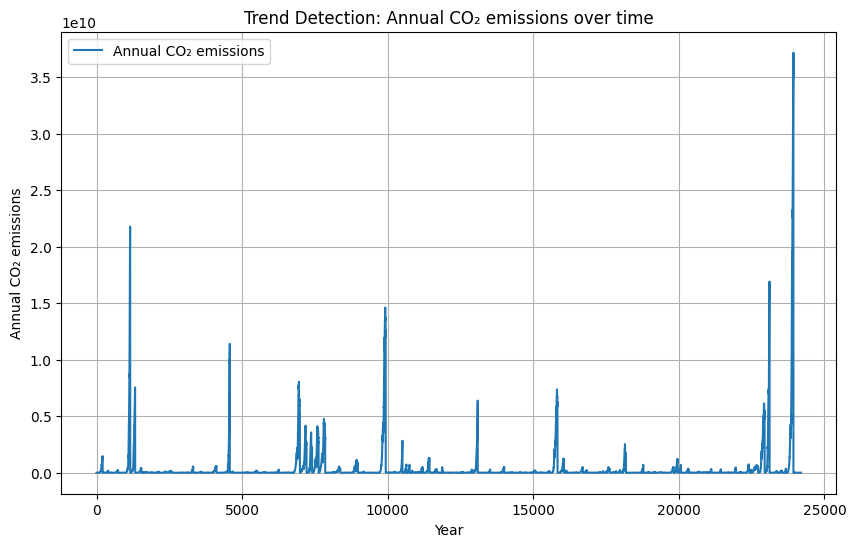

In [36]:
# Trend Detection: Plot emissions data to identify long-term movements
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['Annual CO₂ emissions'], label='Annual CO₂ emissions')
plt.title('Trend Detection: Annual CO₂ emissions over time')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions')
plt.legend()
plt.grid(True)
plt.show()

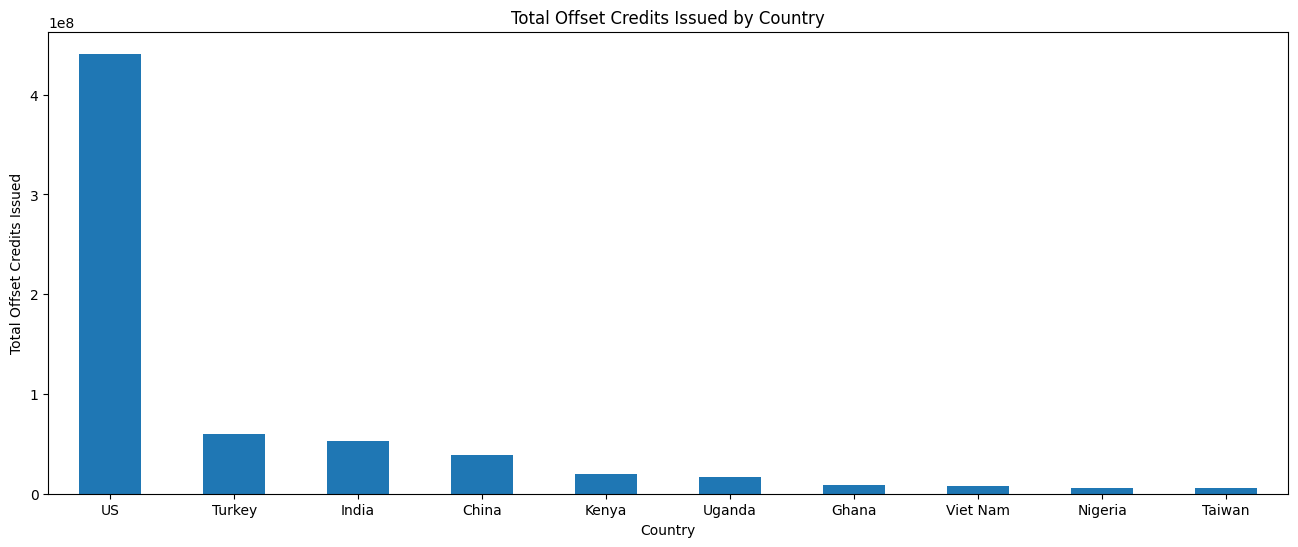

In [37]:
# Top countries by credits issued

#Top 10 Countries issuing the credits
credits_by_country = merged_org_df.groupby('Project Site Country')['Total Offset Credits Issued'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(16,6))
credits_by_country.plot(kind='bar')
plt.title('Total Offset Credits Issued by Country')
plt.xlabel('Country')
plt.ylabel('Total Offset Credits Issued')
plt.xticks(rotation=0)
plt.show()


The US significantly accounts for most of the credits issued across the globe. However, countries like China and India, despite their enourmous amounts of emissions, had almost similar number of credits issued with a developing country like Kenya, which accounts for almost an unsignificant percentage of emissions. 

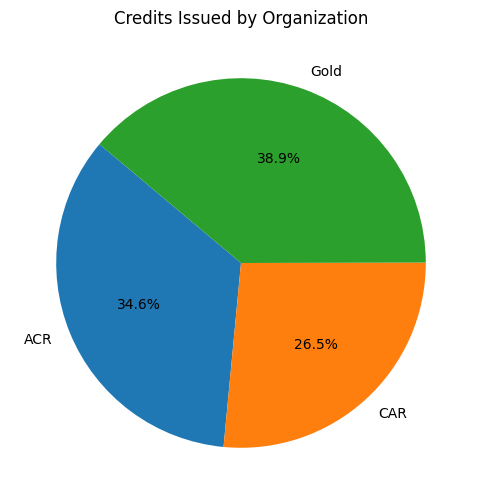

In [38]:
# Credits issued by organizations
credits_by_org = merged_org_df.groupby('Organization')['Total Offset Credits Issued'].sum()

plt.figure(figsize=(16,6))
plt.pie(credits_by_org, labels=credits_by_org.index, autopct='%1.1f%%', startangle=140)
plt.title('Credits Issued by Organization')
plt.show()

Gold projects issued most of the credits.

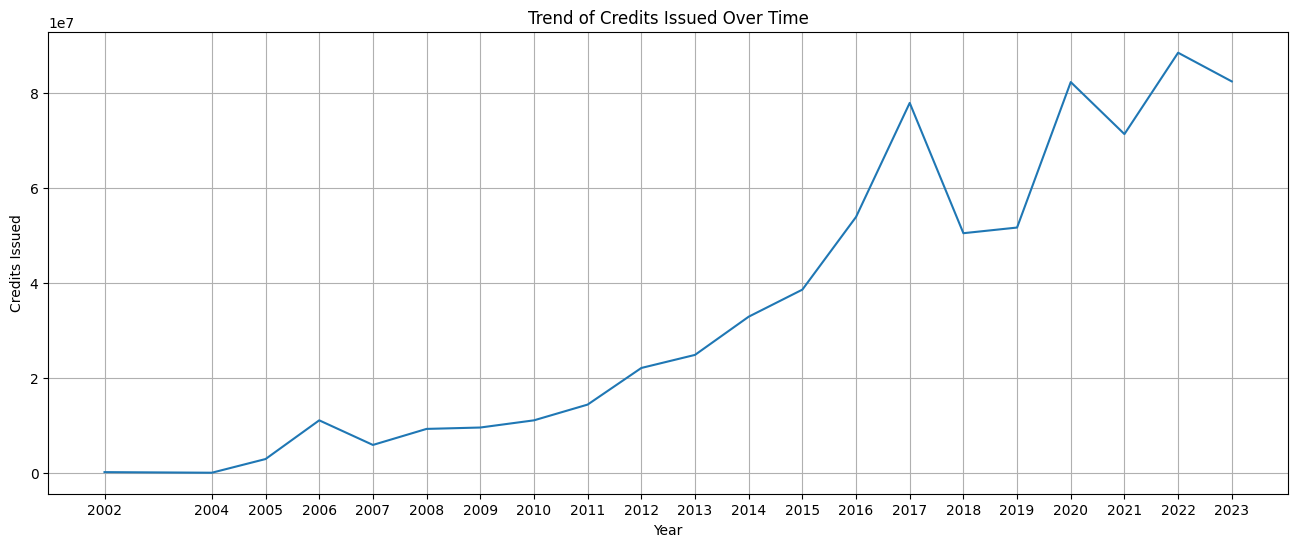

In [39]:
# Trend of Credits Issued over the Years

# Groupby year, then calculate the total credits issued each year
total_credits_by_year = merged_org_df.groupby(merged_org_df['Year'])['Total Offset Credits Issued'].sum()

# Plot total credits issued over time
plt.figure(figsize=(16,6))
total_credits_by_year.plot(kind='line')
plt.title('Trend of Credits Issued Over Time')
plt.xlabel('Year')
plt.ylabel('Credits Issued')
plt.xticks(total_credits_by_year.index)  # Set x-ticks to the years
plt.grid(True)
plt.show()

There is an upward trend for the number of credits issued. However, there was a slight drop between 2017 and 2019, maybe due to the COVID-19 pandemic

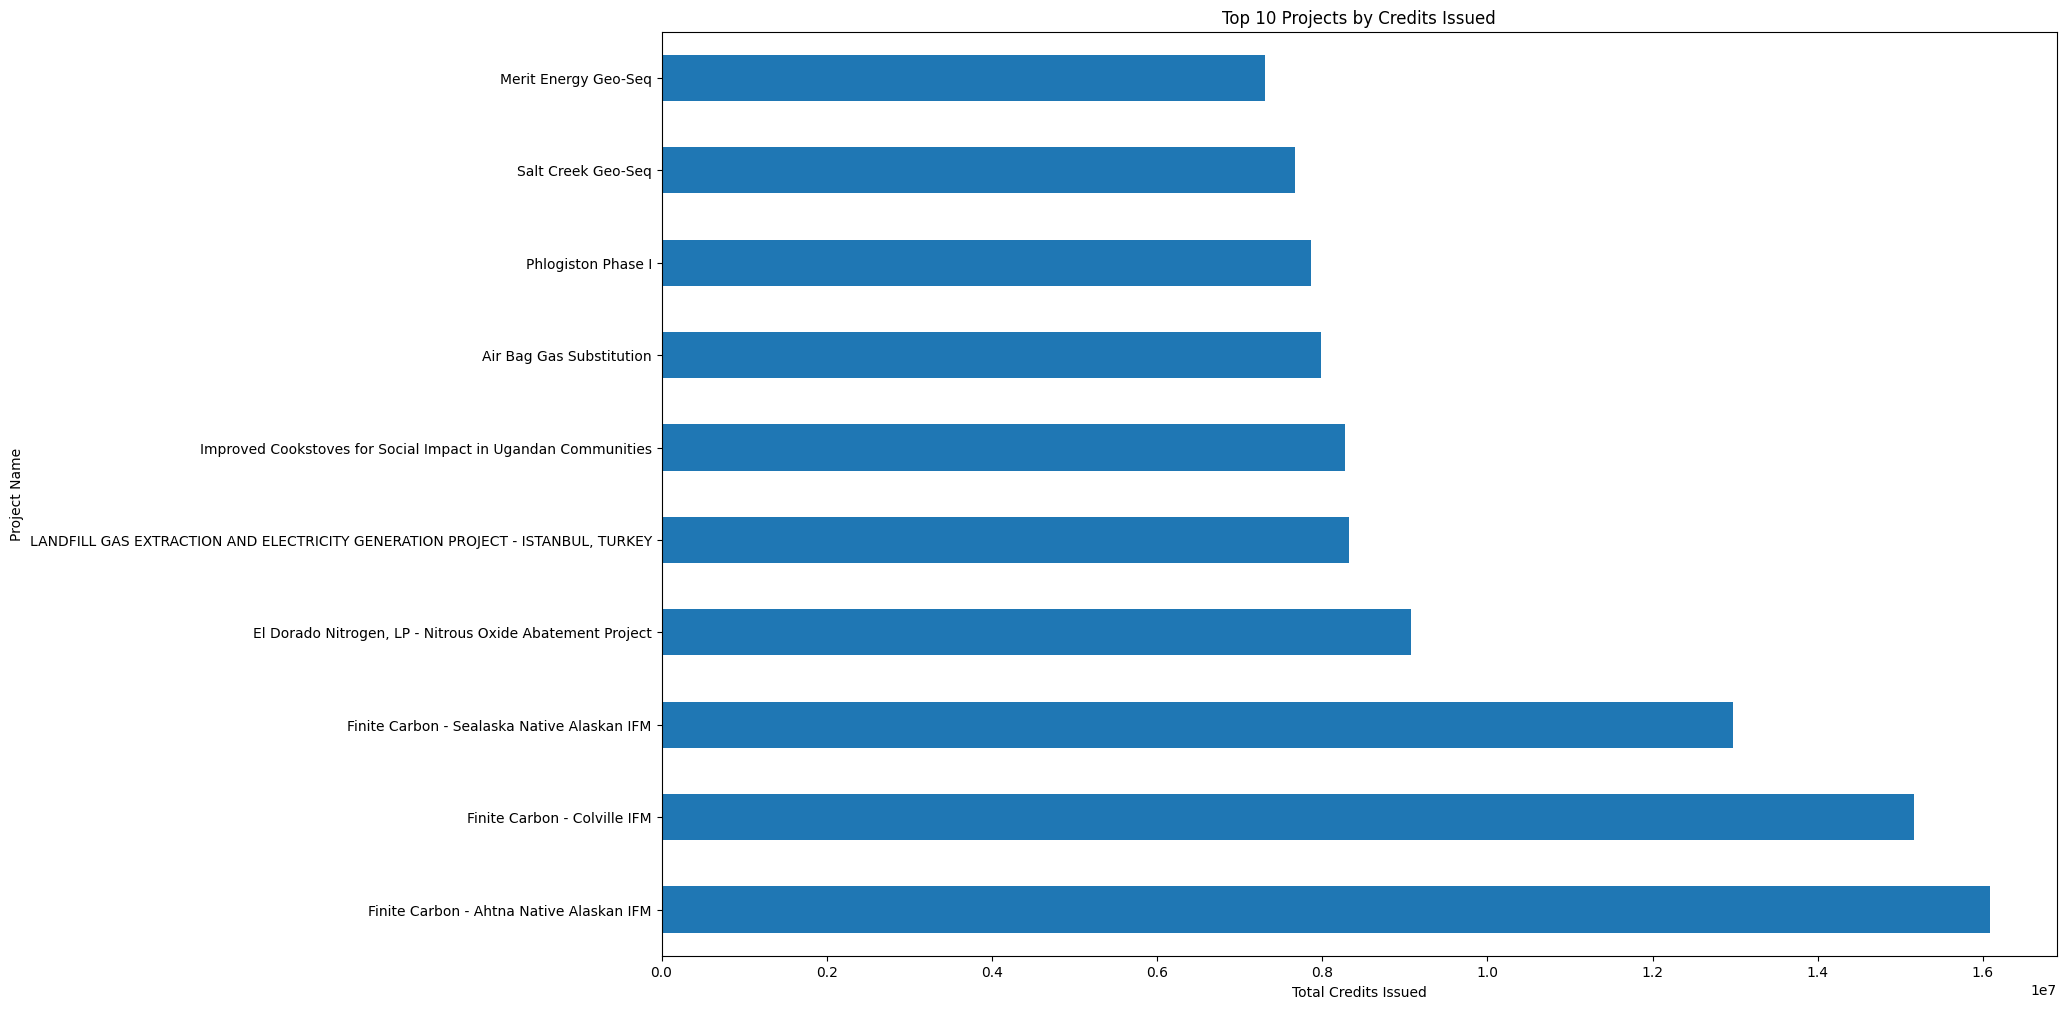

In [40]:
# Credits issued by project name
#Project names
project_names = merged_org_df.groupby('Project Name')['Total Offset Credits Issued'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(18,12))
project_names.plot(kind='barh')
plt.title('Top 10 Projects by Credits Issued')
plt.xlabel('Total Credits Issued')
plt.ylabel('Project Name')
plt.xticks(rotation=0)
plt.show()


Finite Carbon - Ahtma Native Alaskan IFM project had the highest number of credits among all projects, followed by the Finite Carbon - Calville IFM, Finite Carbon - Sealaska Native Alaskan IFM, El Dorado Nitrogen, LP - Nitrous Oxide Abatement Project, and Landfill Gas Fixtation and Electricity Generation Project in Instanbul, Turkey, respectively. 

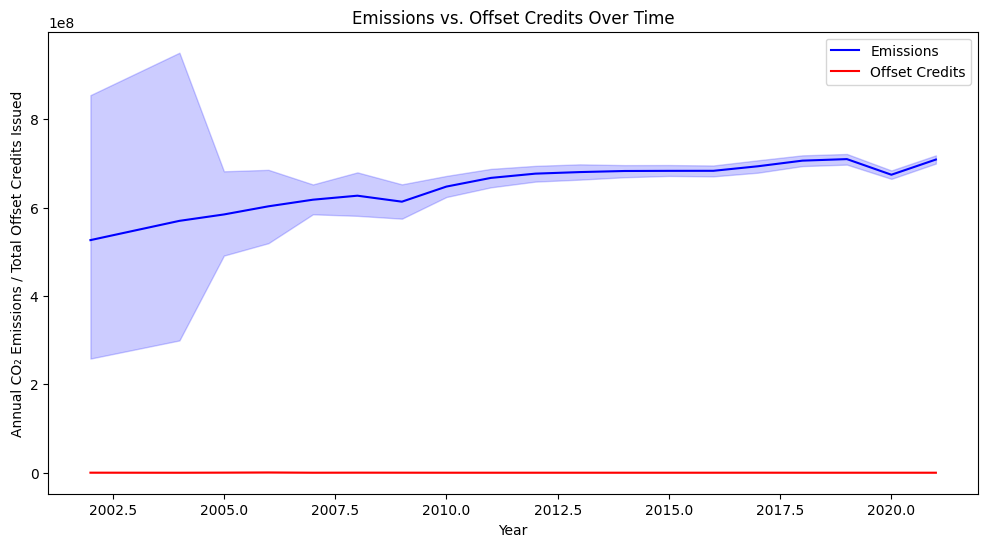

In [41]:
# Plotting emissions vs. offset credits
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Annual CO₂ emissions', data=merged_data, label='Emissions', color='blue')
sns.lineplot(x='Year', y='Total Offset Credits Issued', data=merged_data, label='Offset Credits', color='red')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions / Total Offset Credits Issued')
plt.title('Emissions vs. Offset Credits Over Time')
plt.legend()
plt.show()

#### Comparative Analysis

Top 10 countries by Total Offset Credits Issued

<Axes: xlabel='Project Site Country'>

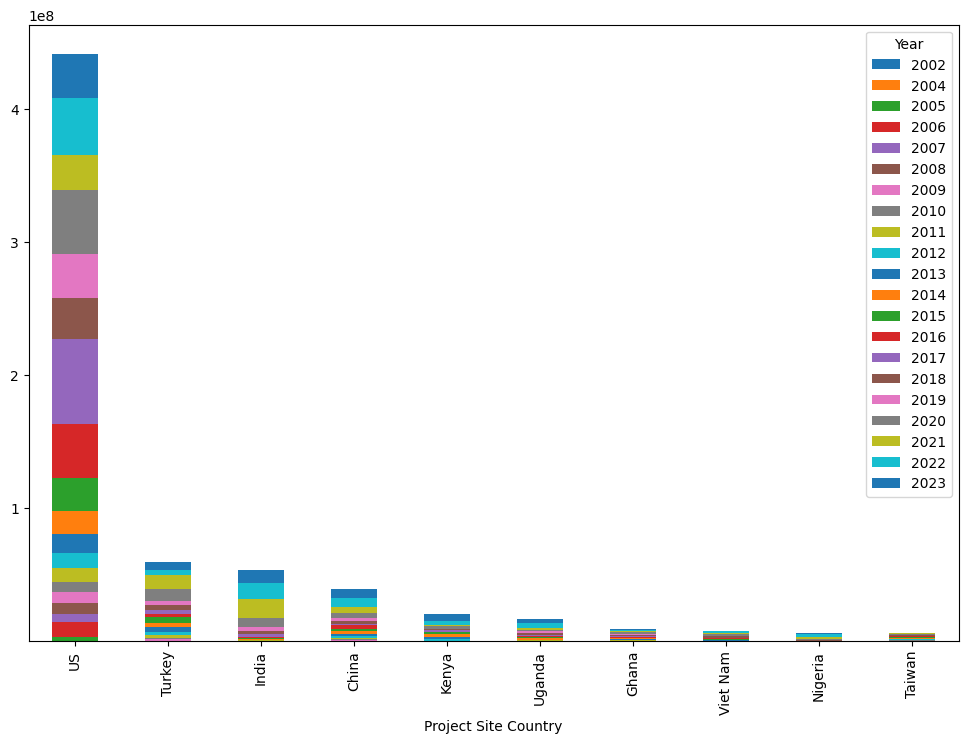

In [56]:
# Group data by country and year, calculate cumulative credits
grouped_data = merged_org_df.groupby(["Project Site Country", "Year"])["Total Offset Credits Issued"].sum().unstack()

# Sort the DataFrame by the sum of credits in descending order
sorted_data = grouped_data.sum(axis=1).sort_values(ascending=False)

# Take the top 10 countries based on the sum of credits
top_countries = sorted_data.head(10)

# Select only the top countries from the grouped data
top_grouped_data = grouped_data.loc[top_countries.index]

# Create the stacked bar chart
top_grouped_data.plot(kind="bar", stacked=True, figsize=(12, 8))


Over time the cummulative credits issued have declined over the years for the top 10 countries issuing.

There was a significant rise in Carbon credits issued in 2017 in the USA.This could be attributed to policy changes, climate, and even economic factors.
2010 and 2012 were also big years where carbon credits were offered in the USA

The graph is skewed an indication that companies havent really been using carbon credits USA being the exception

#### Bubble map

In [63]:
#printing a list for all the credits issued for these top 5 companies
import pandas as pd

# Assuming 'Project Site Country', 'Total Offset Credits Issued' are columns in your DataFrame
# Replace 'df' with your actual DataFrame name

# Filter DataFrame for the specific countries
selected_countries = ['US', 'Turkey', 'India', 'China','Kenya','Uganda','Ghana','Vietnam']
filtered_df = merged_org_df[merged_org_df['Project Site Country'].isin(selected_countries)]

# Group by 'Project Site Country' and sum the 'Total Offset Credits Issued' for each country
total_credits_by_country = filtered_df.groupby('Project Site Country')['Total Offset Credits Issued'].sum().reset_index()

# Display the result
print(total_credits_by_country)


  Project Site Country  Total Offset Credits Issued
0                China                   38674429.0
1                Ghana                    8733485.0
2                India                   53075268.0
3                Kenya                   19812066.0
4               Turkey                   59469001.0
5                   US                  441042358.0
6               Uganda                   16304248.0


In [67]:
import folium

# Project data with pre-defined coordinates
project_data = {
    "Country": ["US", "Turkey", "India", "China", "Kenya", "Uganda", "Ghana"],
    "Lat": [37.7749, 39.9334, 20.5937, 35.8617, 1.2833, 0.315, 5.5517],
    "Lon": [-122.4194, 32.8597, 78.9629, 104.1954, 36.8167, 32.65, -0.2170],
    "Credits Issued": [441042358.0, 594469001.0, 53075268.0, 38674429.0,19812066.0,16304248.0,8733485.0] 
}

# Create a base map
m = folium.Map(location=[20, 20], zoom_start=2)

# Add bubbles with coordinates and data
for country, lat, lon, credits in zip(project_data["Country"], project_data["Lat"], project_data["Lon"], project_data["Credits Issued"]):
    # Adjust the color based on the number of credits issued
    color = 'green' if credits < 20000000 else 'orange' if credits < 30000000 else 'red'
    
    # Create a circle marker
    circle_marker = folium.CircleMarker([lat, lon],
                                       radius=credits / 10000000,  # Adjust radius scaling for better visualization
                                       color=color,
                                       fill_color='transparent',
                                       fill_opacity=0.7,
                                       tooltip=f"<b>Country:</b> {country}\n<b>Credits Issued:</b> {credits:,.0f}\n")
    
    # Add a pop-up with additional information
    popup_content = f"<b>Country:</b> {country}<br><b>Credits Issued:</b> {credits:,.0f}"
    folium.Popup(popup_content).add_to(circle_marker)

    # Add the circle marker to the map
    circle_marker.add_to(m)

# Display the map
m


- *Circle Size:** The larger the circle, the higher the total carbon credits issued for that country.
- *Color Gradient:** Countries with higher total credits tend to have a red circle, while countries with lower credits have green circles.
 The United States, Turkey, and India show substantial carbon credit issuance.
- China, Kenya, Uganda, and Ghana also contribute to the global carbon offset efforts.


In [42]:
# Set 'Year' column as the index
merged_df.set_index('Year', inplace=True)

In [43]:
# Correlation analysis
from scipy.stats import pearsonr, spearmanr
correlation_pearson, _ = pearsonr(merged_df['Annual CO₂ emissions'], merged_df['Cumulative CO₂ emissions'])
correlation_spearman, _ = spearmanr(merged_df['Annual CO₂ emissions'], merged_df['Cumulative CO₂ emissions'])
print("Pearson correlation coefficient:", correlation_pearson)
print("Spearman correlation coefficient:", correlation_spearman)

Pearson correlation coefficient: 0.9461472986670074
Spearman correlation coefficient: 0.9786521376347804


In [44]:
# Hypothesis testing - testing correlation significance
alpha = 0.05  # significance level
p_value_pearson = 0
p_value_spearman = 0
if abs(correlation_pearson) < 1:
    p_value_pearson = 2 * (1 - abs(correlation_pearson))
if abs(correlation_spearman) < 1:
    p_value_spearman = 2 * (1 - abs(correlation_spearman))
print("Pearson correlation p-value:", p_value_pearson)
print("Spearman correlation p-value:", p_value_spearman)
if p_value_pearson < alpha:
    print("Pearson correlation is statistically significant")
else:
    print("Pearson correlation is not statistically significant")
if p_value_spearman < alpha:
    print("Spearman correlation is statistically significant")
else:
    print("Spearman correlation is not statistically significant")

Pearson correlation p-value: 0.10770540266598516
Spearman correlation p-value: 0.042695724730439144
Pearson correlation is not statistically significant
Spearman correlation is statistically significant


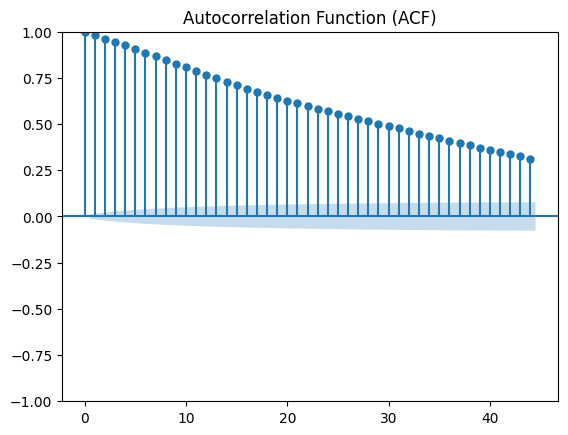

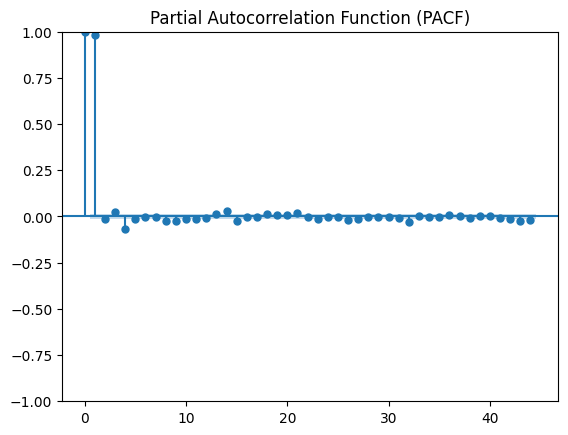

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(merged_df['Annual CO₂ emissions'])
plt.title('Autocorrelation Function (ACF)')
plt.show()

# PACF plot
plot_pacf(merged_df['Annual CO₂ emissions'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [46]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(merged_df['Annual CO₂ emissions'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -15.589947987673465
p-value: 1.8856650786238573e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Augmented Dickey-Fuller (ADF) test, is used to test for the presence of a unit root in a time series dataset, indicating whether the series is stationary or not.

Interpretation:
* The ADF test results suggest that the time series data is stationary. This conclusion is supported by the very low p-value, indicating strong evidence against the presence of a unit root. Additionally, the ADF statistic is lower than all the critical values at the 1%, 5%, and 10% significance levels, further supporting the rejection of the null hypothesis of non-stationarity. Therefore, the time series data is likely stationary, which is often desirable for many time series analysis techniques.

In [47]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 3  # Choose maximum lag for the test
granger_test_result = grangercausalitytests(merged_df[['Annual CO₂ emissions', 'Cumulative CO₂ emissions']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=361.7669, p=0.0000  , df_denom=24192, df_num=1
ssr based chi2 test:   chi2=361.8118, p=0.0000  , df=1
likelihood ratio test: chi2=359.1332, p=0.0000  , df=1
parameter F test:         F=361.7669, p=0.0000  , df_denom=24192, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=182.1917, p=0.0000  , df_denom=24189, df_num=2
ssr based chi2 test:   chi2=364.4586, p=0.0000  , df=2
likelihood ratio test: chi2=361.7408, p=0.0000  , df=2
parameter F test:         F=182.1917, p=0.0000  , df_denom=24189, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=172.7981, p=0.0000  , df_denom=24186, df_num=3
ssr based chi2 test:   chi2=518.5442, p=0.0000  , df=3
likelihood ratio test: chi2=513.0652, p=0.0000  , df=3
parameter F test:         F=172.7981, p=0.0000  , df_denom=24186, df_num=3


Granger causality is a statistical concept used to determine whether one time series variable can predict another.

* Number of Lags: This refers to the number of past observations of the variables being considered in the test. Each test is performed with a specific number of lags, which indicates how far back in time the influence of one variable on another is considered.

* SSR-based F Test: This test compares the fit of a model with lagged values of the potentially causing variable against the fit of a model without those lagged values. The F-statistic measures the ratio of the explained variation to the unexplained variation in the model. The reported p-value indicates the significance level of the test. In all cases, the p-values are extremely low (p=0.0000), suggesting strong evidence against the null hypothesis that the potentially causing variable does not Granger-cause the other variable.

* SSR-based Chi-squared Test: This test is another way to assess the significance of Granger causality. Like the F-test, it compares the fit of models with and without lagged values of the potentially causing variable. The reported p-values are very low, indicating strong evidence against the null hypothesis of no Granger causality.

* Likelihood Ratio Test: This is a statistical test used to compare the fit of two models, one with the lagged values of the potentially causing variable and one without. Again, the extremely low p-values suggest strong evidence against the null hypothesis.

* Parameter F Test: This test assesses the joint significance of all lagged values of the potentially causing variable. As with the other tests, the p-values are very low, indicating strong evidence against the null hypothesis.

In conclusion, the results indicate that there is strong evidence of Granger causality between the variables being tested, regardless of the number of lags considered. This suggests that the potentially causing variable has predictive power over the other variable.




In [48]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# merged_df.set_index('Year', inplace=True)

# # Infer the frequency of the DatetimeIndex
# freq = pd.infer_freq(merged_df.index)

# # If the frequency is None, set it explicitly to 'AS'
# if freq is None:
#     merged_df.index.freq = 'AS'
# else:
#     merged_df.index.freq = freq



# # Decompose the time series into trend, seasonal, and residual components
# decomposition = seasonal_decompose(merged_df['Annual CO₂ emissions'], model='additive')

# # Plot the decomposed components
# plt.figure(figsize=(12, 8))
# plt.subplot(411)
# plt.plot(decomposition.trend)
# plt.title('Trend')
# plt.subplot(412)
# plt.plot(decomposition.seasonal)
# plt.title('Seasonal')
# plt.subplot(413)
# plt.plot(decomposition.resid)
# plt.title('Residual')
# plt.tight_layout()
# plt.show()


In [49]:
# Drop rows with NaN values
merged_data.dropna(inplace=True)


In [50]:
# # Further causal analysis using Granger causality
# max_lag = 5 
# granger_test_result = grangercausalitytests(merged_data[['Annual CO₂ emissions', 'Total Offset Credits Issued']], max_lag)

/tmp/ipykernel_34595/1604155355.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


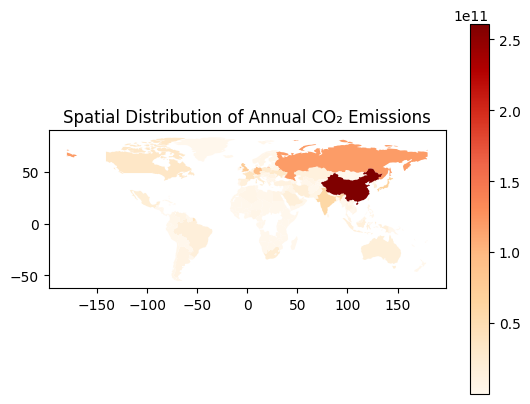

In [51]:
import geopandas as gpd

# Load a world shapefile for visualization
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(merged_df.groupby('Entity')['Annual CO₂ emissions'].sum().reset_index(), left_on='name', right_on='Entity')

# Plot emissions spatially
world.plot(column='Annual CO₂ emissions', cmap='OrRd', legend=True)
plt.title('Spatial Distribution of Annual CO₂ Emissions')
plt.show()
